<a href="https://colab.research.google.com/github/Tamerstito/vhs-intro-ai/blob/main/Titanic_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, you will explore the famous Titanic dataset to understand how data can provide insights into the survival of passengers. You will use the Pandas library in Python to analyze and visualize the data.

*Note: Points for each section are given in [].*


In [5]:
# Import libraries [6]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# numpy
# pandas
# matplotlib


# Get Data
Upload `train.csv` to a Google folder named `vhs-ai-intro`. Load this file into a dataframe named `df`. [6]





In [38]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')
# access file and load into data frame
csv_file  = '/content/drive/MyDrive/train.csv'
df = pd.read_csv(csv_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Explore Data

In [39]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Look at the output of `df.info()` above and answer the following: [8]

1. How many rows and columns does `df` have?

There are 891 rows and 12 columns
2. Identify the columns that have integer datatype.

PassengerID, survived, Pclass, SibSp, Parch
3. Identify the columns containing `null` (empty) values and calculate the proportion of values that are `null`.

Age, Cabin, Embarked
There are 177 nans in Age.
There are 687 nans in Cabin.
There are 2 nans in Embarked.






# Data Cleaning

In [8]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)


In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


Explain what the above line of code is doing. You can use `df.info()` to check the changes in `df`. [2]

It is dropping the columns 'PassengerId', 'Name, 'Ticket'

In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)

Using the `fillna()` function, we can fill the missing values in the `Age` column with the median value of `Age`.

What does the `inplace` parameter specify in the `fillna()` function? [2]

It specifies whether it will modify the original dataframe. If it is false, it will instead only pass a version of the df that is modified instead of modifying the original dataframe

# Data Analysis

Let's do some counting. Using `groupby` and `size()`, or otherwise:

1. Count the number of male and female passengers. (*Hint: Use `Sex` column*) [2]

577 male, and 314 female
2. What percentage of passengers survived? (*Hint: Use `Survived` column*) [2]

38% survived

In [11]:
# Number of male & female passengers
df_gender = df.groupby('Sex')
df_gender.size()

,0
Sex,
female,314
male,577


In [19]:
# Percentage of passengers that survived
df_survival = df.groupby('Survived')
df_survival.size()

,0
Survived,
0,549
1,342


We want to see if gender played a role in the survival rates. Let us visualise the survival rates. We will combine the 2 columns `Survived` and `Sex` to answer this and use `Matplotlib` to plot the counts.

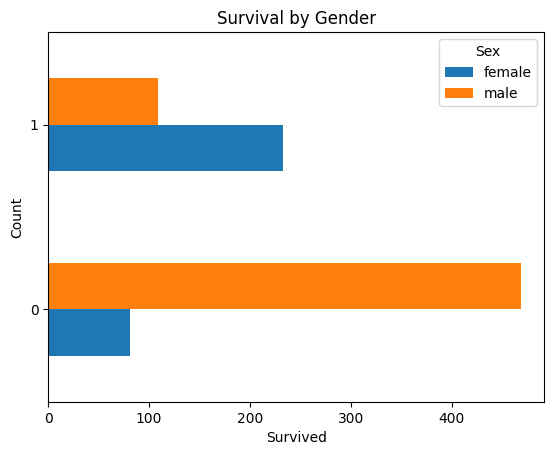

In [32]:
# Group the data by 'Survived' and 'Sex' and get the counts
survival_gender_counts = df.groupby(['Survived', 'Sex']).size().unstack()

# Plot the grouped data
survival_gender_counts.plot(kind='barh')

# Add title and labels
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')

# Show the plot
plt.show()

In [40]:
survival_gender_counts

Sex,female,male
Survived,,
0,81,468
1,233,109


Let us pay attention to the code.


1.   `survival_gender_counts` holds the counts of number of survivors that are male and female. What is the type of this variable? How many rows and columns does this variable have? [2]

It is a dataframe of integers. There are 3 columns and 2 rows. The columns being survived, female, and male, and the rows being the survival status, marked by an integer of either 1, showing they are alive, or 0, showing they are deceased.

2.   In the `survival_gender_counts.plot(kind='bar')` line, what does the `kind='bar'` parameter specify? How would the plot change if you used `kind='barh'` instead? [4]

It specifies the type of graph it is which in this case is a bar graph. By setting it to barh, it would flip the graph 90 degrees to have the bars travel horizontally.

We can create the same plot with another library `Seaborn` that is built on top of `Matplotlib`.

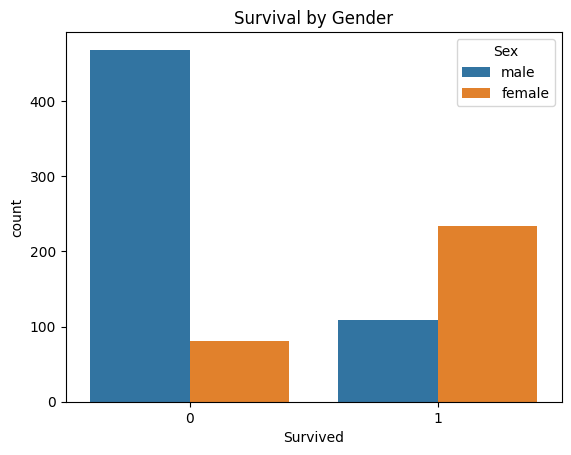

In [33]:
import seaborn as sns
sns.countplot(x='Survived', hue='Sex', data=df)

plt.title('Survival by Gender')
plt.show()

We used the function `countplot()` in `seaborn` to generate the bar plot showing the counts we need.

Explain what each of the parameters for `countplot()` specify. [6]

X and hue are the different variables from the data that are being used, survived and sex. Hue is a grouping variable that produces different bars with different colours in addition to the x. X is the value presented in the x-axis. Data is the data that is being used, it takes in a dataframe and uses it along with x and hue in order to determine what data to use in the graph.

By looking at the plot, do you think gender and survival were related? Explain why or why not.    [3]

A much larger percentage of women survived in comparison to men, so I believe that gender and survival were related. This may be due to the fact that men may have stayed behind to ensure that the women and children got out safely before they began leaving resulting in the death of more men and the survival of more women, It is important to note that there were more men in general as well.

In the Titanic dataset, `Pclass` refers to the passenger class, which indicates the socioeconomic status (SES) of the passengers. There are three classes:

* 1 = First class (Upper class)
* 2 = Second class (Middle class)
* 3 = Third class (Lower class)

Using `seaborn` library, create a count plot (similar to the one above) to show the relationship between survivors and passenger class.

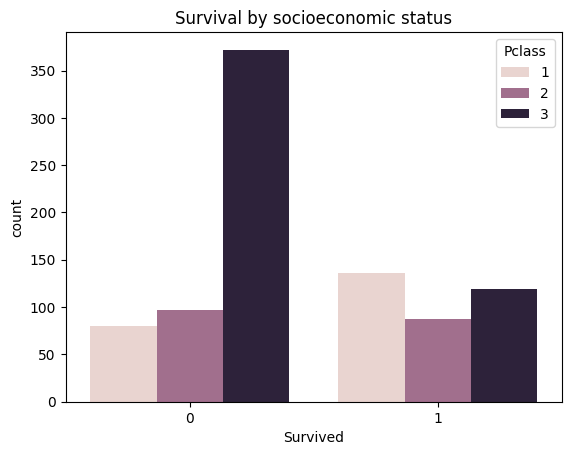

In [35]:
# Plot Survival by Passenger Class [6]
sns.countplot(x='Survived', hue='Pclass', data = df)

plt.title('Survival by socioeconomic status')
plt.show()

By looking at the plot, do you think passenger class and survival were related? Explain why or why not. [3]

I believe that the passenger class and survival were related. A much much larger percentage of third class, lower class, passengers died in comparison to the other classes. This could be as a result of being in the lower decks of the ship, making it much harder to survive in comparison to the other classes. Next, the only class that had a higher percentage of survivals compared to deaths was the first class, ie upper class, this could be a result to them being in facilities that were higher up on the ship as well as possibly being prioritised for evacuation as compared to the other types of passengers. Overall, a strong correlation is present between passenger class and survival